In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Imports

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Initialise empty grid containing beam pattern

The following scheme is devised using the Parkes multibeam reciever footprint as shown in Evan Keane's thesis, figure 4.3:

<img src="ParkesMultibeamKeane.png">

Within this scheme, the beams are labelled according to the configuration provided by: http://www.atnf.csiro.au/research/multibeam/instrument/description.html

<img src="beam_id_config.gif">

Where beams 1-9 are renamed B1-B9, beams 10-13 are renamed BA-BD, and B12=BC is the topmost beam in Evan's figure.

The original pattern has a shifted y-axis of this footprint where all even y columns are offset from odd y-columns by half a beam.

In this scheme:

This grid is of dimensions (14x13)
The x-axis is a true representation of the x-axis parkes multibeam layout
The y-axis' odd columns are a true representation of the y-axis odd column layout
The y-axis' even columns are offset from the true Parkes y-azis even column layout by -0.5 to account for placement of beams.

See work on 28/06/2019 in my notebook (day 06/2019) for further workings used to devise this scheme.

In [3]:
grid = np.zeros((14,13))

In [4]:
print grid

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Fill grid with Parkes telescope beams

In [5]:
#Beam coordinates
B1=(5,5) #Beam 1
B2=(4,7) #Beam 2
B3=(6,7) #Beam 3
B4=(7,5) #Beam 4
B5=(6,3) #Beam 5
B6=(4,3) #Beam 6
B7=(3,5) #Beam 7
B8=(2,7) #Beam 8
B9=(5,9) #Beam 9
BA=(8,7) #Beam A
BB=(8,3) #Beam B
BC=(5,1) #Beam C
BD=(2,3) #Beam D

#Fill grid
grid[B1] = 1 
grid[B2] = 1 
grid[B3] = 1
grid[B4] = 1
grid[B5] = 1
grid[B6] = 1
grid[B7] = 1 
grid[B8] = 1 
grid[B9] = 1
grid[BA] = 1 
grid[BB] = 1 
grid[BC] = 1 
grid[BD] = 1 

In [6]:
print grid

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Plot the grid

Note that due to the way python assigns x and y indices, the beam patter appears rotated compared to figure 4.3 above.

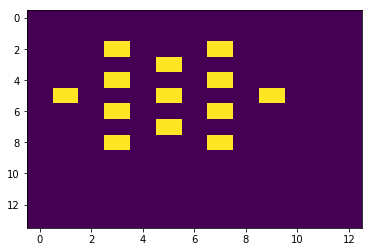

In [7]:
plt.imshow(grid,aspect='auto')

 # Define functions to search beam footprints around a grid position

Acceptable beam footprints for a bright astrophysical single pulse to fall into include:

Beam Pattern 1: pulse contained within a single beam of the telescope

Beam Pattern 2: pulse is strong enough to be seen within a 1-beam radius of its pointing center

Beam Pattern 3: pulse is strong enough to be seen within a 2-beam radius of its pointing center

See my notebook: 'page 28/06/19 - Parkes Coincidencer' for derivations of the coordinates for these patterns on our shifted grid.

In [13]:
def BeamPattern1Search(grid,BeamCoordsNames,i,j):
    """
    Returns the beams within a 0-beam radius of pointing (i,j) according to the Parkes
    13-beam reciever pointing pattern.
    
    I.e., returns beam when (i,j) is coincident with beam location
    
    INPUTS:
    
    grid : (2D array) a grid containing the Parkes 13 beam reciever beam pattern on the sky, 
                      translated from offset grid format to regular grid format
                
    BeamCoordsNames : (zipped list) a list of each beam's name (B1, B2, ...) and its coordinate on grid
                                            
    i    : (int) x-axis coordinate of center of pointing
    j    : (int) y-axis coordinate of center of pointing
    
    RETURNS :
    
    BeamCombos : (list) For the given central coordinate pair, the number of beams ocurring 
                        within a 1-beam radius 
    
    """
    
    #initialise list of beam coordinates which fall within pattern
    BeamCombos = []
    #initalise list of beam names which fall within pattern
    BeamComboNames = []
    
    #get coordinates and names of beams which fall within pattern
    
    try:
        if grid[i,j]==1:
            BeamCombos.append((i,j))
            for Coord,Name in BeamCoordsNames:
                if (i,j)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i,j))
            
    
    return BeamCombos,BeamComboNames
            

def BeamPattern2Search(grid,BeamCoordsNames,i,j):
    """
    Returns the beams within a 1-beam radius of a pointing (i,j) according to the Parkes
    13-beam reciever pointing pattern
    
    Inputs:
    
    grid : (2D array) a grid containing the Parkes 13 beam reciever beam pattern on the sky, 
                      translated from offset grid format to regular grid format
                
    BeamCoordsNames : (zipped list) a list of each beam's name (B1, B2, ...) and its coordinate on grid
                                            
    i    : (int) x-axis coordinate of center of pointing
    j    : (int) y-axis coordinate of center of pointing
    
    returns :
    
    BeamCombos : (list) For the given central coordinate pair, the number of beams ocurring 
                        within a 1-beam radius 
    
    """
    
    #initialise list of beam coordinates which fall within pattern
    BeamCombos = []
    #initalise list of beam names which fall within pattern
    BeamComboNames = []
    
    #get coordinates and names of beams which fall within pattern
    
    try:
        if grid[i,j]==1:
            BeamCombos.append((i,j))
            for Coord,Name in BeamCoordsNames:
                if (i,j)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i,j))
    try:
        if grid[i+1,j]==1:
            BeamCombos.append((i+1,j))
            for Coord,Name in BeamCoordsNames:
                if (i+1,j)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+1,j))
    try:
        if grid[i+1,j-1]==1:
            BeamCombos.append((i+1,j-1))
            for Coord,Name in BeamCoordsNames:
                if (i+1,j-1)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+1,j-1))
    try:
        if grid[i+1,j+1]==1:
            BeamCombos.append((i+1,j+1))
            for Coord,Name in BeamCoordsNames:
                if (i+1,j+1)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+1,j+1))
    try:
        if grid[i+2,j]==1:
            BeamCombos.append((i+2,j))
            for Coord,Name in BeamCoordsNames:
                if (i+2,j)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+2,j))
    try:
        if grid[i+2,j-1]==1:
            BeamCombos.append((i+2,j-1))
            for Coord,Name in BeamCoordsNames:
                if (i+2,j-1)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+2,j-1))
    try:
        if grid[i+2,j+1]==1:
            BeamCombos.append((i+2,j+1))
            for Coord,Name in BeamCoordsNames:
                if (i+2,j+1)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+2,j+1))
            
    
    return BeamCombos,BeamComboNames


def BeamPattern3Search(grid,BeamCoordsNames,i,j):
    """
    Returns the beams within a 2-beam radius of a pointing (i,j) according to the Parkes
    13-beam reciever pointing pattern
    
    Inputs:
    
    grid : (2D array) a grid containing the Parkes 13 beam reciever beam pattern on the sky, 
                      translated from offset grid format to regular grid format
                
    BeamCoordsNames : (zipped list) a list of each beam's name (B1, B2, ...) and its coordinate on grid
                                            
    i    : (int) x-axis coordinate of center of pointing
    j    : (int) y-axis coordinate of center of pointing
    
    returns :
    
    BeamCombos : (list) For the given central coordinate pair, the number of beams ocurring 
                        within a 1-beam radius 
    
    """
    
    #initialise list of beam coordinates which fall within pattern
    BeamCombos = []
    #initalise list of beam names which fall within pattern
    BeamComboNames = []
    
    #get coordinates and names of beams which fall within pattern
    
    try:
        if grid[i,j]==1:
            BeamCombos.append((i,j))
            for Coord,Name in BeamCoordsNames:
                if (i,j)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i,j))    
    try:
        if grid[i+1,j]==1:
            BeamCombos.append((i+1,j))
            for Coord,Name in BeamCoordsNames:
                if (i+1,j)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+1,j))    
    try:
        if grid[i+2,j]==1:
            BeamCombos.append((i+2,j))
            for Coord,Name in BeamCoordsNames:
                if (i+2,j)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+2,j))
    try:
        if grid[i+3,j]==1:
            BeamCombos.append((i+3,j))
            for Coord,Name in BeamCoordsNames:
                if (i+3,j)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+3,j))
    try:
        if grid[i+4,j]==1:
            BeamCombos.append((i+4,j))
            for Coord,Name in BeamCoordsNames:
                if (i+4,j)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+4,j))
    try:
        if grid[i+1,j-1]==1:
            BeamCombos.append((i+1,j-1))
            for Coord,Name in BeamCoordsNames:
                if (i+1,j-1)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+1,j-1))
    try:
        if grid[i+2,j-1]==1:
            BeamCombos.append((i+2,j-1))
            for Coord,Name in BeamCoordsNames:
                if (i+2,j-1)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+2,j-1))
    try:
        if grid[i+3,j-1]==1:
            BeamCombos.append((i+3,j-1))
            for Coord,Name in BeamCoordsNames:
                if (i+3,j-1)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+3,j-1))
    try:
        if grid[i+4,j-1]==1:
            BeamCombos.append((i+4,j-1))
            for Coord,Name in BeamCoordsNames:
                if (i+4,j-1)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+4,j-1))
    try:
        if grid[i+1,j-2]==1:
            BeamCombos.append((i+1,j-2))
            for Coord,Name in BeamCoordsNames:
                if (i+1,j-2)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+1,j-2))
    try:
        if grid[i+2,j-2]==1:
            BeamCombos.append((i+2,j-2))
            for Coord,Name in BeamCoordsNames:
                if (i+2,j-2)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+2,j-2))
        
    try:
        if grid[i+3,j-2]==1:
            BeamCombos.append((i+3,j-2))
            for Coord,Name in BeamCoordsNames:
                if (i+3,j-2)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+3,j-2))
    try:
        if grid[i+1,j+1]==1:
            BeamCombos.append((i+1,j+1))
            for Coord,Name in BeamCoordsNames:
                if (i+1,j+1)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+1,j+1))
    try:
        if grid[i+2,j+1]==1:
            BeamCombos.append((i+2,j+1))
            for Coord,Name in BeamCoordsNames:
                if (i+2,j+1)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+2,j+1))
    try:
        if grid[i+3,j+1]==1:
            BeamCombos.append((i+3,j+1))
            for Coord,Name in BeamCoordsNames:
                if (i+3,j+1)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+3,j+1))
    try:
        if grid[i+4,j+1]==1:
            BeamCombos.append((i+4,j+1))
            for Coord,Name in BeamCoordsNames:
                if (i+4,j+1)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+4,j+1))
    try:
        if grid[i+1,j+2]==1:
            BeamCombos.append((i+1,j+2))
            for Coord,Name in BeamCoordsNames:
                if (i+1,j+2)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+1,j+2))
    try:
        if grid[i+2,j+2]==1:
            BeamCombos.append((i+2,j+2))
            for Coord,Name in BeamCoordsNames:
                if (i+2,j+2)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+2,j+2))
    try:
        if grid[i+3,j+2]==1:
            BeamCombos.append((i+3,j+2))
            for Coord,Name in BeamCoordsNames:
                if (i+3,j+2)==Coord:
                    BeamComboNames.append(Name)
    except IndexError:
        print("Indices combination ({0},{1}) doesn't exist".format(i+3,j+2))
        
          
    return BeamCombos,BeamComboNames          
          
          
          
          
          
            
          
          
          
          
  
          
  
        
        
     


# Loop over grid positions, search each beam pattern to see the combination of beams it contains

In [14]:

#define a list containing beam coordinates
BeamCoords = [B1,B2,B3,B4,B5,B6,B7,B8,B9,BA,BB,BC,BD]
#their respective beam names
BeamNames = ['B1','B2','B3','B4','B5','B6','B7','B8','B9','BA','BB','BC','BD']


#zip these identifiers together
BeamCoordsNames = zip(BeamCoords,BeamNames)

#initialise empty array containing all allowed Beam combinations
AllGoodBeamCombos = []

print BeamCoordsNames

#loop over x-axis
for i in range(grid.shape[0]):
    #loop over y-axis
    for j in range(grid.shape[1]):
        
        print (i,j)
        
        #search beam pattern 1 (at beam center)
        BeamCombos,BeamComboNames = BeamPattern1Search(grid,BeamCoordsNames,i,j) #get allowed beam combinations
        if len(BeamCombos)!=0:
            AllGoodBeamCombos.append(BeamComboNames)
            
        #search eam Pattern 2 (within 1-beam radius)
        BeamCombos,BeamComboNames = BeamPattern2Search(grid,BeamCoordsNames,i,j) #get allowed beam combinations
        if len(BeamCombos)!=0:
            AllGoodBeamCombos.append(BeamComboNames)
            
        #search eam Pattern 3 (within 1-beam radius)
        BeamCombos,BeamComboNames = BeamPattern3Search(grid,BeamCoordsNames,i,j) #get allowed beam combinations
        if len(BeamCombos)!=0:
            AllGoodBeamCombos.append(BeamComboNames)

        

[((5, 5), 'B1'), ((4, 7), 'B2'), ((6, 7), 'B3'), ((7, 5), 'B4'), ((6, 3), 'B5'), ((4, 3), 'B6'), ((3, 5), 'B7'), ((2, 7), 'B8'), ((5, 9), 'B9'), ((8, 7), 'BA'), ((8, 3), 'BB'), ((5, 1), 'BC'), ((2, 3), 'BD')]
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
Indices combination (1,13) doesn't exist
Indices combination (2,13) doesn't exist
Indices combination (3,13) doesn't exist
(0, 12)
Indices combination (1,13) doesn't exist
Indices combination (2,13) doesn't exist
Indices combination (1,13) doesn't exist
Indices combination (2,13) doesn't exist
Indices combination (3,13) doesn't exist
Indices combination (4,13) doesn't exist
Indices combination (1,14) doesn't exist
Indices combination (2,14) doesn't exist
Indices combination (3,14) doesn't exist
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
Indices combination (2,13) doesn't exist
Indices combination (3,13) doesn't exist
Indices combination (4,13) doesn't ex

# sort the acceptable beam combinations that a bright source may fall into according to patterns

In [15]:
AllGoodSorted = []
#sort individual lists
for i in np.unique(AllGoodBeamCombos):
    AllGoodSorted.append(np.sort(i))
#sort list of lists for visual clarity
AllGoodSorted_final = sorted(AllGoodSorted,key=lambda x : x[-1])

#Note, it's more complicated than it's worth to then sort by next lowest beam etc...


# Print the acceptable beam combinations a bright source may fall into according to patterns

In [16]:
for i in AllGoodSorted_final:
    print i

['B1']
['B2']
['B1' 'B2']
['B1' 'B3']
['B2' 'B3']
['B3']
['B1' 'B4']
['B1' 'B2' 'B3' 'B4']
['B3' 'B4']
['B4']
['B1' 'B3' 'B4' 'B5']
['B1' 'B5']
['B5']
['B4' 'B5']
['B6']
['B1' 'B6']
['B5' 'B6']
['B1' 'B4' 'B5' 'B6']
['B1' 'B5' 'B6' 'B7']
['B7']
['B1' 'B7']
['B1' 'B2' 'B3' 'B7']
['B1' 'B2' 'B3' 'B4' 'B5' 'B6' 'B7']
['B1' 'B2' 'B6' 'B7']
['B2' 'B7']
['B6' 'B7']
['B1' 'B2' 'B7' 'B8']
['B2' 'B7' 'B8']
['B8']
['B2' 'B8']
['B2' 'B7' 'B8']
['B7' 'B8']
['B1' 'B2' 'B3' 'B9']
['B2' 'B3' 'B9']
['B2' 'B9']
['B1' 'B2' 'B3' 'B7' 'B8' 'B9']
['B2' 'B8' 'B9']
['B9']
['B2' 'B9']
['B2' 'B3' 'B9']
['B3' 'B9']
['B2' 'B8' 'B9']
['B1' 'B3' 'B4' 'BA']
['B1' 'B2' 'B3' 'B4' 'B9' 'BA']
['B3' 'BA']
['B3' 'B4' 'BA']
['B3' 'B9' 'BA']
['B3' 'B4' 'BA']
['B4' 'BA']
['B3' 'B9' 'BA']
['BA']
['B1' 'B3' 'B4' 'B5' 'BA' 'BB']
['B4' 'BB']
['B4' 'BA' 'BB']
['B5' 'BB']
['B1' 'B4' 'B5' 'BB']
['B4' 'B5' 'BB']
['BB']
['B4' 'BB']
['B1' 'B4' 'B5' 'B6' 'BB' 'BC']
['B1' 'B5' 'B6' 'BC']
['B6' 'BC']
['BC']
['B5' 'BC']
['B5' 'BB' 'BC']


# Save acceptable beam combinations combinations to file

In [17]:
np.savetxt('AllowedParkesBeamCombos.txt',AllGoodSorted_final,fmt='%s')